# Principal Component Analysis

---

## 1. Data preprocessing

### a. Import dữ liệu và xử lý NaN, blank,...

In [1]:
from data import *

In [2]:
data = DATA('csv/_Wage_data.csv')
dataset = data.load_data()
dataset

,IQ,KWW,age,black,educ,enroll,exper,expersq,fatheduc,id,...,reg668,reg669,sinmom14,smsa,smsa66,south,south66,step14,wage,weight
0,93.0,35.0,27,0,12,0,9,81,8.0,3,...,0,0,0,1,1,0,0,0,481,380166
1,103.0,42.0,34,0,12,0,16,256,14.0,4,...,0,0,0,1,1,0,0,0,721,367470
2,88.0,25.0,27,0,11,0,10,100,11.0,5,...,0,0,0,1,1,0,0,0,250,380166
3,108.0,34.0,34,0,12,0,16,256,8.0,6,...,0,0,0,1,1,0,0,0,729,367470
4,85.0,38.0,26,0,12,0,8,64,9.0,7,...,0,0,0,1,1,0,0,0,500,380166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,78.0,35.0,30,1,16,0,8,64,5.0,5162,...,0,0,0,0,0,1,1,1,625,118905
1596,100.0,33.0,27,0,12,0,9,81,7.0,5186,...,0,0,0,0,0,1,1,0,263,91831
1597,105.0,38.0,27,0,14,0,7,49,5.0,5187,...,0,0,0,0,0,1,1,0,432,91831
1598,82.0,30.0,30,1,16,0,8,64,16.0,5199,...,0,0,0,1,0,1,1,0,513,140524


### b. Lựa chọn feature

#### - So sánh độ tương quan (correlation)

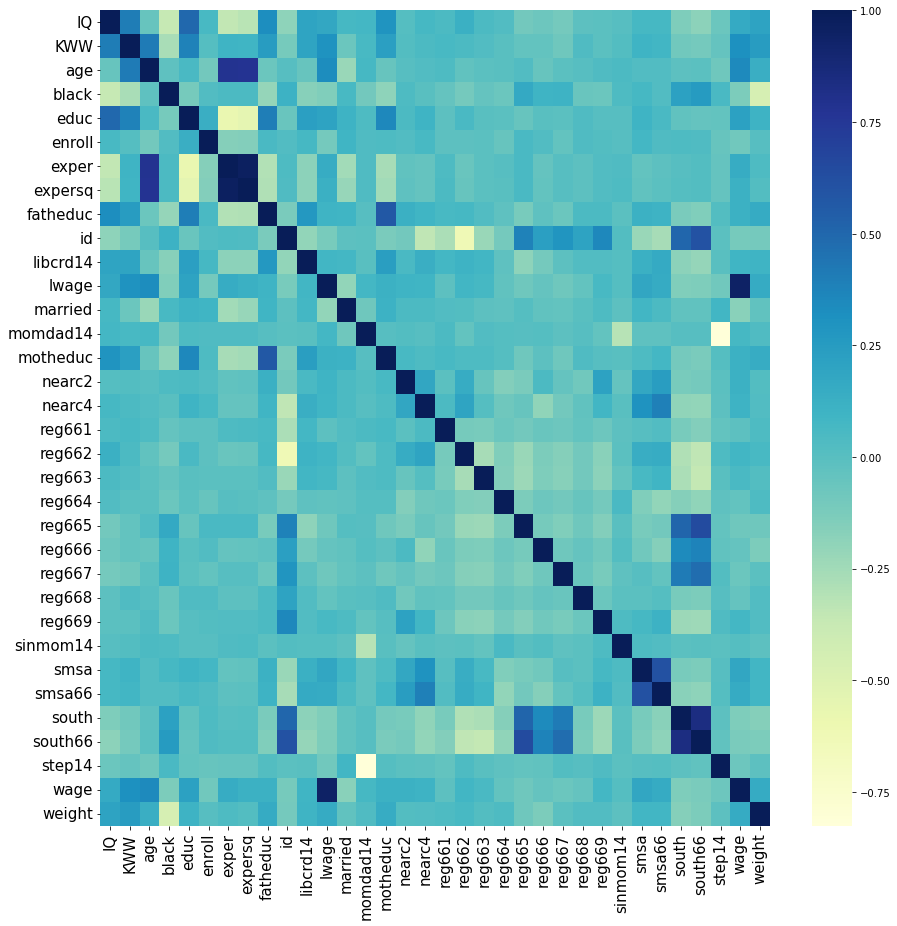

In [3]:
plt.figure(figsize = (15, 15))
datacorr = dataset.corr()
dataplot = sb.heatmap(datacorr, cmap='YlGnBu')
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.show()

#### - Lọc các feature có độ tương quan cao

In [4]:
datacorr[datacorr['wage'] > 0.15]

,IQ,KWW,age,black,educ,enroll,exper,expersq,fatheduc,id,...,reg668,reg669,sinmom14,smsa,smsa66,south,south66,step14,wage,weight
IQ,1.000000,0.406533,-0.050638,-0.365210,0.498726,0.063149,-0.354192,-0.326339,0.325960,-0.186687,...,-0.016520,-0.006413,0.002510,0.067104,0.072589,-0.138552,-0.176956,-0.065097,0.162637,0.203646
KWW,0.406533,1.000000,0.411394,-0.272109,0.381941,0.015694,0.095248,0.088083,0.249432,-0.111497,...,0.034202,-0.011840,0.021191,0.099668,0.087109,-0.087656,-0.100765,-0.045482,0.309104,0.245286
age,-0.050638,0.411394,1.000000,-0.026559,0.055397,-0.095285,0.779367,0.773037,-0.068115,0.004368,...,0.007523,0.036930,0.044363,0.028638,0.025532,-0.018061,-0.010742,-0.083680,0.346151,0.129956
educ,0.498726,0.381941,0.055397,-0.110022,1.000000,0.134800,-0.582432,-0.541075,0.396790,-0.059841,...,0.036934,0.001707,0.004653,0.096154,0.058224,-0.032241,-0.047141,-0.037560,0.216279,0.105261
lwage,0.175366,0.306664,0.335503,-0.143328,0.201809,-0.102619,0.146501,0.125506,0.096992,-0.119118,...,-0.038189,0.062614,0.014915,0.185348,0.152230,-0.148199,-0.135014,-0.084924,0.947070,0.153958
smsa,0.067104,0.099668,0.028638,0.066339,0.096154,0.074557,-0.037024,-0.030528,0.121973,-0.220973,...,-0.011989,0.067225,0.038272,1.000000,0.609059,-0.117470,-0.133329,0.006411,0.183259,0.080960
smsa66,0.072589,0.087109,0.025532,0.025806,0.058224,0.033598,-0.015750,-0.008587,0.107733,-0.265796,...,0.011544,0.110137,0.023498,0.609059,1.000000,-0.174853,-0.184747,0.011192,0.155867,0.085451
wage,0.162637,0.309104,0.346151,-0.129131,0.216279,-0.085665,0.146090,0.122725,0.121847,-0.111540,...,-0.043161,0.074017,0.012600,0.183259,0.155867,-0.136367,-0.126553,-0.074720,1.000000,0.151766
weight,0.203646,0.245286,0.129956,-0.460250,0.105261,0.007245,0.039747,0.021377,0.158431,-0.100873,...,0.026486,0.023466,-0.013551,0.080960,0.085451,-0.157695,-0.133803,-0.016475,0.151766,1.000000


#### feature_corr - Sử dụng như một trường hợp để so sánh

In [5]:
feature_corr = ['IQ', 'KWW', 'age', 'educ', 'lwage', 'smsa', 'smsa66', 'wage', 'weight']
feature_corr

['IQ', 'KWW', 'age', 'educ', 'lwage', 'smsa', 'smsa66', 'wage', 'weight']

#### feature - Chọn theo ảnh hưởng thực tế

In [6]:
feature

['nearc4', 'educ', 'age', 'black', 'wage', 'IQ', 'lwage']

### c. Chia tập feature và predict

In [7]:
X, y = setup_data(feature)
print('Feature: \n\n', X)
print()
print('Predict: \n\n', y)

Feature: 

 [[  0.          12.          27.           0.          93.
    6.17586708]
 [  0.          12.          34.           0.         103.
    6.58063889]
 [  1.          11.          27.           0.          88.
    5.52146101]
 ...
 [  0.          14.          27.           0.         105.
    6.06842613]
 [  1.          16.          30.           1.          82.
    6.24027586]
 [  1.          13.          27.           0.         102.
    6.21460819]]

Predict: 

 [481 721 250 ... 432 513 500]



---

## 2. PCA

### a. Mean Centering/Normalize data

In [8]:
mean_data = X - np.mean(X, axis=0)
mean_data

array([[ -0.705625  ,  -2.126875  ,  -1.178125  ,  -0.099375  ,
        -10.86125   ,  -0.16733247],
       [ -0.705625  ,  -2.126875  ,   5.821875  ,  -0.099375  ,
         -0.86125   ,   0.23743933],
       [  0.294375  ,  -3.126875  ,  -1.178125  ,  -0.099375  ,
        -15.86125   ,  -0.82173854],
       ...,
       [ -0.705625  ,  -0.126875  ,  -1.178125  ,  -0.099375  ,
          1.13875   ,  -0.27477342],
       [  0.294375  ,   1.873125  ,   1.821875  ,   0.900625  ,
        -21.86125   ,  -0.10292369],
       [  0.294375  ,  -1.126875  ,  -1.178125  ,  -0.099375  ,
         -1.86125   ,  -0.12859136]])

### b. Compute the covariance matrix

In [9]:
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
cov

array([[ 2.1000e-01,  1.0000e-01,  3.0000e-02, -0.0000e+00,  4.9000e-01,
         2.0000e-02],
       [ 1.0000e-01,  5.1200e+00,  3.7000e-01, -7.0000e-02,  1.6920e+01,
         1.9000e-01],
       [ 3.0000e-02,  3.7000e-01,  8.6200e+00, -2.0000e-02, -2.2300e+00,
         4.1000e-01],
       [-0.0000e+00, -7.0000e-02, -2.0000e-02,  9.0000e-02, -1.6400e+00,
        -2.0000e-02],
       [ 4.9000e-01,  1.6920e+01, -2.2300e+00, -1.6400e+00,  2.2458e+02,
         1.1000e+00],
       [ 2.0000e-02,  1.9000e-01,  4.1000e-01, -2.0000e-02,  1.1000e+00,
         1.8000e-01]])

### c. Compute and sort the Eigenvalues and Eigenvectors

In [10]:
eig_val, eig_vec = np.linalg.eig(cov)

indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]

print('Eigenvalues:\n', eig_val)
print()
print('Eigenvectors:\n', eig_vec)

Eigenvalues:
 [2.25917454e+02 8.68007410e+00 3.76583099e+00 2.11283355e-01
 1.50201319e-01 7.51563302e-02]

Eigenvectors:
 [[ 2.19734686e-03  5.02295923e-03 -1.63804719e-02 -9.71335122e-01
  -2.34055004e-01  3.77883272e-02]
 [ 7.63909548e-02  1.11743300e-01 -9.90296508e-01  2.16731604e-02
  -1.47040982e-02  1.74569925e-02]
 [-1.00911984e-02  9.92431094e-01  1.12250947e-01  1.45062179e-02
  -4.65140740e-02  2.10391914e-03]
 [-7.26351265e-03 -3.56751542e-03 -1.60248982e-02 -1.23556784e-04
  -1.57909137e-01 -9.87290437e-01]
 [ 9.96985929e-01  1.19738681e-03  7.70127141e-02  1.78853078e-03
  -4.69226613e-03 -7.83891093e-03]
 [ 4.90503729e-03  5.05427253e-02 -1.60148581e-02 -2.36272534e-01
   9.58061153e-01 -1.53163359e-01]]


### d. Compute the explained variance 

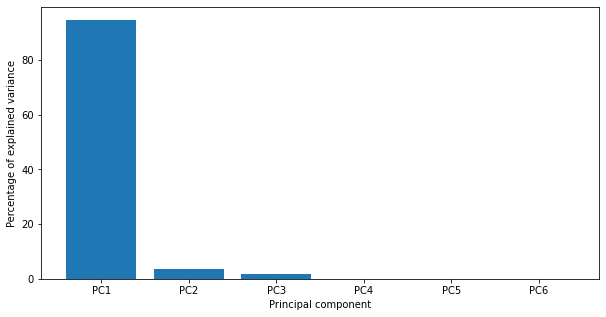

[94.6  3.6  1.6  0.1  0.1  0. ]


In [11]:
from pca import *

sum_eig_val = np.sum(eig_val)
explained_variance = eig_val / sum_eig_val

plot(explained_variance, (10, 5))

### e. Select N components and Transform data

In [12]:
N_components=2
eigenvector_subset = eig_vec[:,0:N_components]
pca_data0 = np.dot(eigenvector_subset.transpose(),mean_data.transpose()).transpose()

print(pca_data0)

[[-10.98074821  -1.43152428]
 [ -1.07954188   5.54792552]
 [-16.04308135  -1.57730702]
 ...
 [  1.13533785  -1.19909939]
 [-21.67705345   1.98428179]
 [ -1.92909652  -1.30202345]]


### PCA with Scaled Data

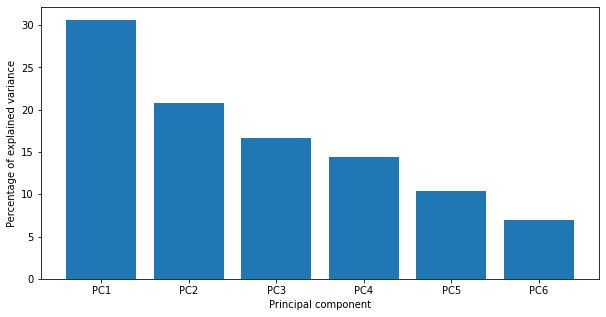

[30.6 20.8 16.7 14.4 10.4  7. ]


In [13]:
pca_data = pca(X)

plot(pca_data.get_variance_ratio(), (10, 5))

In [14]:
pca_data = pca_data.get_pca_dataset()
pca_data

array([[ 1.27579187, -0.31579394],
       [ 0.06256536,  1.69521313],
       [ 1.9760738 , -0.741851  ],
       ...,
       [ 0.45015158, -0.86810451],
       [ 1.48896594,  1.35416784],
       [ 0.29341723, -0.33568054]])

## 3. Predict with Linear Regression

### 3.1 Training model

#### a. Train, test split

In [15]:
X_train, X_test, y_train, y_test = train_test_data(X, y)
X_pca_train, X_pca_test, y_train, y_test = train_test_data(pca_data, y)

#### b. Fit model

In [16]:
from sklearn.linear_model import LinearRegression

LR_normal = LinearRegression()
LR_pca = LinearRegression()

LR_normal.fit(X_train, y_train)
LR_pca.fit(X_pca_train, y_train)

LinearRegression()

### 3.2 Predict

#### a. Random test set

In [17]:
import random

n = 500
id_list = []
for i in range(n):
    id_list.append(random.randint(0, X_test.shape[0] - 1))
    
y_used = []
for id in id_list:
    y_used.append(y_test[id])

#### b. Predict before PCA

In [18]:
pred_normal = {}
plot_normal = []
diff_normal = []
for id in id_list:
    pred = LR_normal.predict([X_test[id].tolist()]).round()[0]
    plot_normal.append(pred)
    pred_normal[id] = pred
    diff_normal.append(round(abs(1 - (pred / y_test[id])) * 100, 1))

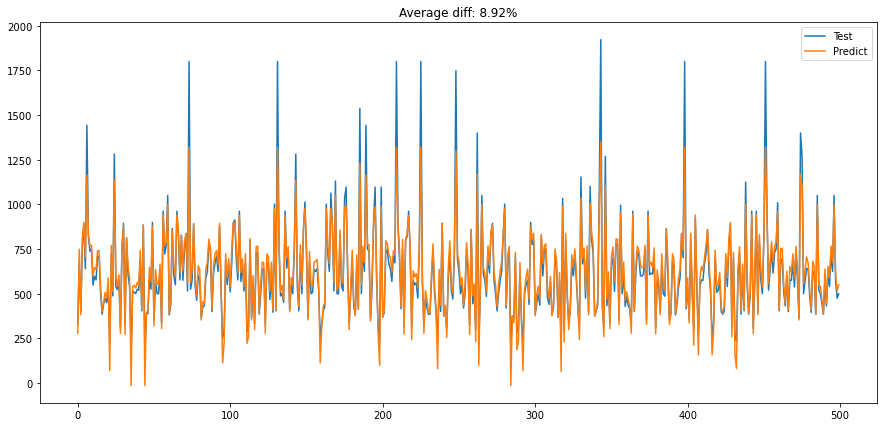

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(y_used)
plt.plot(plot_normal)
plt.legend(['Test', 'Predict'])
plt.title(f'Average diff: {round(np.mean(diff_normal), 2)}%')
plt.show()

#### c. Predict after PCA

In [20]:
pred_pca = {}
plot_pca = []
diff_pca = []
for id in id_list:
    pred = LR_pca.predict([X_pca_test[id].tolist()]).round()[0]
    plot_pca.append(pred)
    pred_pca[id] = pred
    diff_pca.append(round(abs(1 - (pred / y_test[id])) * 100, 1))

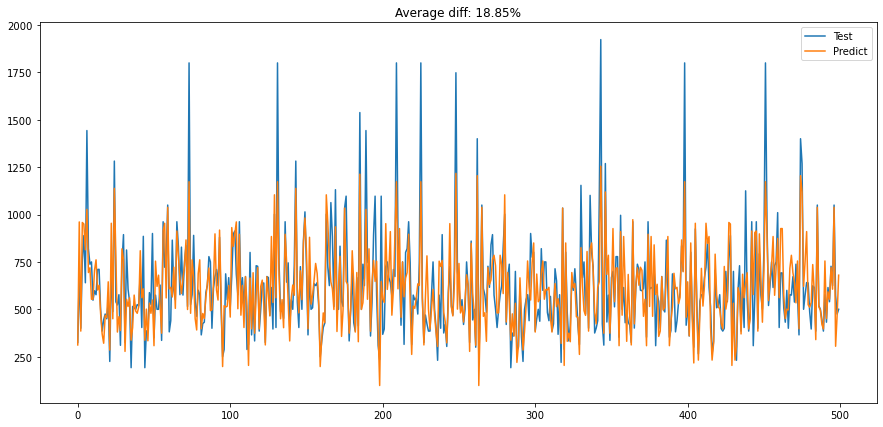

In [21]:
plt.figure(figsize=(15, 7))
plt.plot(y_used)
plt.plot(plot_pca)
plt.legend(['Test', 'Predict'])
plt.title(f'Average diff: {round(np.mean(diff_pca), 2)}%')
plt.show()

#### d. If not Scale Data

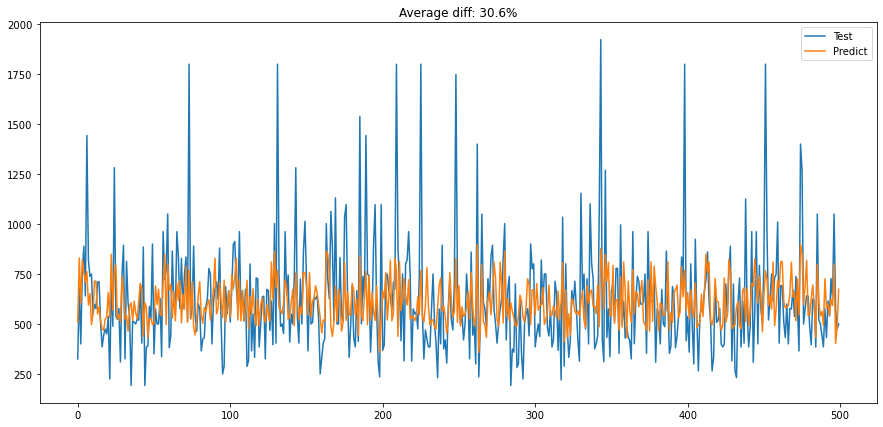

In [22]:
X_0_train, X_0_test, y_train, y_test = train_test_data(pca_data0, y)
LR0 = LinearRegression()
LR0.fit(X_0_train, y_train)
pred_0 = {}
plot_0 = []
diff_0 = []
for id in id_list:
    pred = LR0.predict([X_0_test[id].tolist()]).round()[0]
    plot_0.append(pred)
    pred_0[id] = pred
    diff_0.append(round(abs(1 - (pred / y_test[id])) * 100, 1))
plt.figure(figsize=(15, 7))
plt.plot(y_used)
plt.plot(plot_0)
plt.legend(['Test', 'Predict'])
plt.title(f'Average diff: {round(np.mean(diff_0), 2)}%')
plt.show()

#### e. Before and after PCA

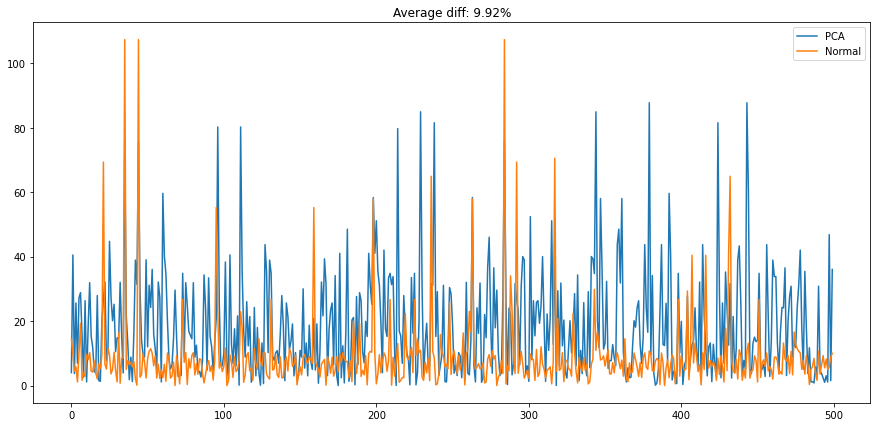

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(diff_pca)
plt.plot(diff_normal)
plt.legend(['PCA', 'Normal'])
plt.title(f'Average diff: {round(np.mean(diff_pca) - np.mean(diff_normal), 2)}%')
plt.show()

---
# END